In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("anshtanwar/pets-facial-expression-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/pets-facial-expression-dataset


In [3]:
import os

# Check the directory structure
for root, dirs, files in os.walk(path):
    print("Directory:", root)
    for name in files[:5]:  # just show a few files
        print("  File:", name)


Directory: /kaggle/input/pets-facial-expression-dataset
Directory: /kaggle/input/pets-facial-expression-dataset/Other
  File: aug-88-54.jpg
  File: 45.jpg
  File: 56.jpg
  File: aug-141-02.jpg
  File: 20.jpg
Directory: /kaggle/input/pets-facial-expression-dataset/Angry
  File: aug-155-08.jpg
  File: 45.jpg
  File: 56.jpg
  File: 89.jpg
  File: 20.jpg
Directory: /kaggle/input/pets-facial-expression-dataset/Sad
  File: aug-154-089.jpg
  File: aug-3-004.jpg
  File: aug-8-009.jpg
  File: aug-137-071.jpg
  File: aug-82-104.jpg
Directory: /kaggle/input/pets-facial-expression-dataset/Master Folder
Directory: /kaggle/input/pets-facial-expression-dataset/Master Folder/valid
Directory: /kaggle/input/pets-facial-expression-dataset/Master Folder/valid/Other
  File: 44.jpg
  File: 50.jpg
  File: 22.jpg
  File: 06.jpg
  File: 17.jpg
Directory: /kaggle/input/pets-facial-expression-dataset/Master Folder/valid/Angry
  File: 44.jpg
  File: 40.jpg
  File: 88.jpg
  File: 64.jpg
  File: 13.jpg
Directory: /

In [4]:
train_dir = os.path.join(path, "Master Folder", "train")
val_dir = os.path.join(path, "Master Folder", "valid")
test_dir = os.path.join(path, "Master Folder", "test")


In [5]:
model = Sequential()


model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │        16,388 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,276,932 (512.23 MB)

 Trainable params: 134,276,932 (512.23 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 1000 images belonging to 4 classes.
Found 36 images belonging to 4 classes.


In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[checkpoint]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2544 - loss: 7.5267
Epoch 1: val_accuracy improved from -inf to 0.25000, saving model to best_model.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.2538 - loss: 7.4028 - val_accuracy: 0.2500 - val_loss: 1.3878
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 537ms/step - accuracy: 0.2421 - loss: 1.3865
Epoch 2: val_accuracy did not improve from 0.25000
32/32 ━━━━━━━━━━━━━━━━━━━━ 62s 545ms/step - accuracy: 0.2413 - loss: 1.3865 - val_accuracy: 0.2500 - val_loss: 1.3860
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 525ms/step - accuracy: 0.2496 - loss: 1.3865
Epoch 3: val_accuracy improved from 0.25000 to 0.30556, saving model to best_model.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.2496 - loss: 1.3865 - val_accuracy: 0.3056 - val_loss: 1.3858
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 534ms/step - accuracy: 0.2430 - loss: 1.3866
Epoch 4: val_accuracy did not improve from 0.30556
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 542ms/step - accuracy: 0.2425 - loss: 1.3866 - val_accuracy: 0.2500 - val_loss: 1.3865
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 525ms/step - accuracy: 0.2468 - loss: 1.3864
Epoch 5: val_accuracy did not improve from 0.30556
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 534ms/step - accuracy: 0.2463 - loss: 1.3864 - val_accuracy: 0.2778 - val_loss: 1.3856
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 529ms/step - accuracy: 0.2984 - loss: 1.3860
Epoch 6: val_accuracy did not improve from 0.30556
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 539ms/step - accuracy: 0.2969 - loss: 1.3860 - val_accuracy: 0.2778 - val_loss: 1.3865
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 528ms/step - accuracy: 0.2476 - loss: 1.3864
Epoch 7: val_accuracy did not impr

In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

model.evaluate(test_generator)


Found 38 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.2451 - loss: 1.3868


[1.3866186141967773, 0.28947368264198303]

In [10]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.2451 - loss: 1.3868 
Test Accuracy: 0.2895
Test Loss: 1.3866


In [13]:
import numpy as np

# Get predictions
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step 


In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
target_names = list(test_generator.class_indices.keys())
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=target_names))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))


Accuracy: 0.2895
Classification Report:
              precision    recall  f1-score   support

       Angry       0.00      0.00      0.00        10
       Other       0.00      0.00      0.00         6
         Sad       0.00      0.00      0.00        11
       happy       0.29      1.00      0.45        11

    accuracy                           0.29        38
   macro avg       0.07      0.25      0.11        38
weighted avg       0.08      0.29      0.13        38

Confusion Matrix:
[[ 0  0  0 10]
 [ 0  0  0  6]
 [ 0  0  0 11]
 [ 0  0  0 11]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


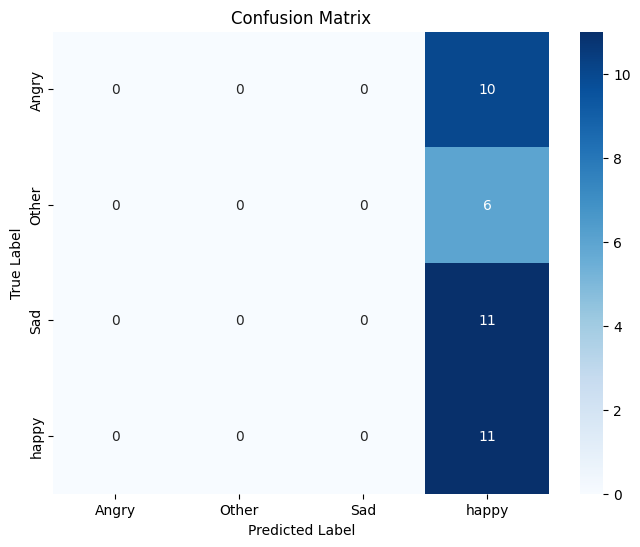

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
